
# Exploratory Data Analysis: Pokemon Pokedex

 I will frame the questions here and answer them.
 If you would like to see the how I reached the 
 solution for those problems please continue down
 this jupyter notebook and read along, enjoy !



## Frame the Problem:


__What Pokémon type has the highest average base stat across each generation, based off primary types?__ ✅


__What Pokémon type has the highest average base stat across each generation, based off secondary types?__ ✅


    __TYPE 1__                   __TYPE 2__
      Primary                     Secondary 

    Generation 1: __Psychic__  Generation 1: __Ice__

    Generation 2: __Steel__    Generation 2: __Steel__

    Generation 3: __Dragon__   Generation 3: __Psychic__

    Generation 4: __Dark__     Generation 4: __Dragon__

    Generation 5: __Dragon__   Generation 5: __Ice__

    Generation 6: __Dragon__   Generation 6: __Dark__
 
    Generation 7: __Psychic__  Generation 7: __Ghost__
 
    Generation 8: __Fairy__    Generation 8: __Fairy__    


•	What is the highest mean stat for each generation? ❗️

•	What stat is the primary per type based off of mean averages of the dominate types found for each gen. ✅

•	What Key features determine a legendary Pokémon? ❗️

•	What key features can determine a type? ❗️

- hp, attack, defense , sp atk, sp def, speed

•	Can you predict that Pokémon consistently with the features provided? ❗️


In [3]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [4]:
pokedex = pd.read_csv('/Users/jtc/Desktop/hello_ds/pokedex_(Update_05.20).csv')

In [5]:
pokedex.head()
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


# INSIGHT NOTE:

Here I check the dataframe and evalute the columns.
I notice that some of them i don't need to solve the 
above listed questions so I need to clean the data 
and make some adjustments that allow me to have a 
more concise dataset.

- I'm going to remove those columns I don't need to clean up my data.

In [6]:
remove_columns = ['german_name','japanese_name','species','type_number','abilities_number','ability_1',
               'ability_2','ability_hidden','percentage_male','egg_cycles','against_normal','against_fire',
               'against_water','against_electric','against_grass','against_ice','against_fight',
              'against_poison','against_ground','against_flying','against_psychic','against_bug',
              'against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy']
pokedex = pokedex.drop(remove_columns, axis = 1)

# INSIGHT NOTE:

Here after removing those columns, I see that to begin to answer my 1st question

- I want to check for particular types of the pokemon and their generation

For example: All Grass types in Gen 1.

After selecting them I want to calculate the average total points.

 - This is essential the base stat of a pokemon, meaning it is the 
   total of all their cumulative stat points. 

Here is pikachu's standard stat spread for example:

Health Points: 35
Attack: 55
Defense: 40
Special Attack: 50
Special Defense: 50 
Speed: 90
Total: 320 < -- this is the total_points I will often call this 'base stat'.

In [7]:
# Group By Method to join type 1 (primary type) and generation juxtapose to total points
# to compare across gen.

type1_avg = pokedex.groupby(['type_1','generation'])['total_points'].mean()
type2_avg = pokedex.groupby(['type_2','generation'])['total_points'].mean()


# INSIGHT NOTE:

Here I take those grouped features and I organize them to be plotted

- In this plot I focus on primary type, this is the first type the pokemon
  has and their average base stat.

For example: A pokemon might have one type or two types.

- Types can vary for that pokemon depending on region and 
  ability but here we are focusing on just that first type
  that pokemon can have.
  



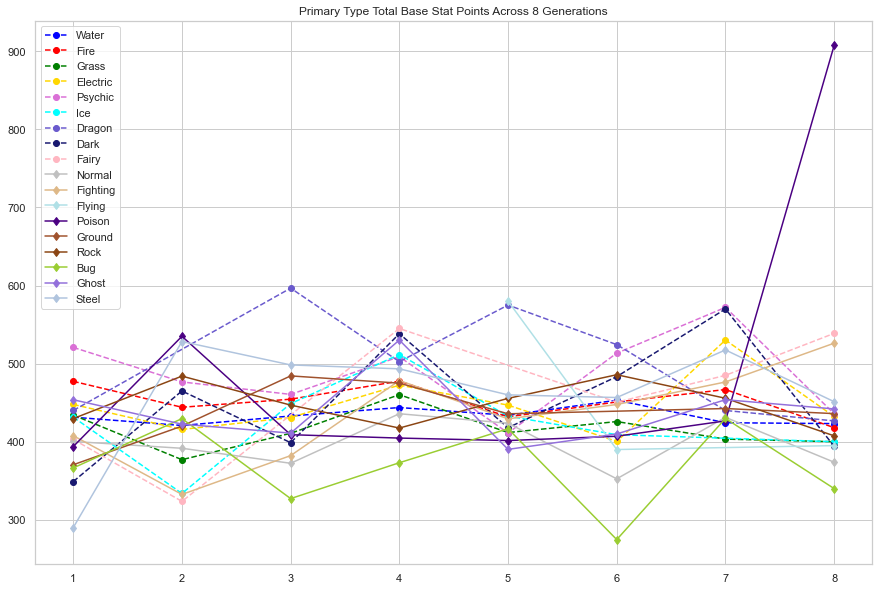

In [8]:
fig = plt.figure(figsize=(15,10))

plt.title('Primary Type Total Base Stat Points Across 8 Generations')

plt.plot(type1_avg.Water, color='blue', linestyle='dashed', marker='o', label='Water')

plt.plot(type1_avg.Fire, color='red', linestyle='dashed', marker='o', label='Fire')

plt.plot(type1_avg.Grass, color='green', linestyle='dashed', marker='o', label='Grass')

plt.plot(type1_avg.Electric, color='gold', linestyle='dashed', marker='o', label='Electric')

plt.plot(type1_avg.Psychic, color='orchid', linestyle='dashed', marker='o', label='Psychic')

plt.plot(type1_avg.Ice, color='cyan', linestyle='dashed', marker='o', label='Ice')

plt.plot(type1_avg.Dragon, color='slateblue', linestyle='dashed', marker='o', label='Dragon')

plt.plot(type1_avg.Dark, color='midnightblue', linestyle='dashed', marker='o', label='Dark')

plt.plot(type1_avg.Fairy, color='lightpink', linestyle='dashed', marker='o', label='Fairy' )

plt.plot(type1_avg.Normal, color='silver', linestyle='solid', marker='d', label='Normal')

plt.plot(type1_avg.Fighting, color='burlywood', linestyle='solid', marker='d', label='Fighting')

plt.plot(type1_avg.Flying, color='powderblue', linestyle='solid', marker='d', label='Flying')

plt.plot(type1_avg.Poison, color='indigo', linestyle='solid', marker='d', label='Poison')

plt.plot(type1_avg.Ground, color='sienna', linestyle='solid', marker='d', label='Ground')

plt.plot(type1_avg.Rock, color='saddlebrown', linestyle='solid', marker='d', label='Rock')

plt.plot(type1_avg.Bug,  color='yellowgreen', linestyle='solid', marker='d', label='Bug')

plt.plot(type1_avg.Ghost,  color='mediumpurple', linestyle='solid', marker='d', label='Ghost')

plt.plot(type1_avg.Steel,  color='lightsteelblue', linestyle='solid', marker='d', label='Steel')

plt.legend(loc="upper left")



# INSIGHT NOTE:

After Evaluation you can see that most of the mean data lies within 400 - 500.

- However you can see a massive outlier of over 900 for poison types.

Lets look into how many pokemon in that generation (gen 8) 
have poison as their primary type.


In [76]:
total_type1_per_gen = pokedex.groupby(['type_1','generation'])['type_1'].count()
total_type2_per_gen = pokedex.groupby(['type_2','generation'])['type_1'].count()

gen_1 = total_type1_per_gen.Psychic
print(gen_1)
gen_2 = total_type1_per_gen.Poison
print(gen_2)
gen_3 = total_type1_per_gen.Dragon
print(gen_3)
gen_4 = total_type1_per_gen.Fairy
print(gen_4)
gen_5 = total_type1_per_gen.Flying
print(gen_5)
gen_6 = total_type1_per_gen.Dragon
print(gen_6)
gen_7 = total_type1_per_gen.Psychic
print(gen_7)
gen_8 = total_type1_per_gen.Poison 
print(gen_8)

generation
1    14
2     7
3    12
4     8
5    14
6     5
7    10
8     6
Name: type_1, dtype: int64
generation
1    17
2     1
3     3
4     6
5     2
6     2
7     6
8     2
Name: type_1, dtype: int64
generation
1     3
3    12
4     4
5     9
6     6
7     3
8     3
Name: type_1, dtype: int64
generation
1    2
2    5
4    1
6    9
7    1
8    4
Name: type_1, dtype: int64
generation
5    2
6    2
8    4
Name: type_1, dtype: int64
generation
1     3
3    12
4     4
5     9
6     6
7     3
8     3
Name: type_1, dtype: int64
generation
1    14
2     7
3    12
4     8
5    14
6     5
7    10
8     6
Name: type_1, dtype: int64
generation
1    17
2     1
3     3
4     6
5     2
6     2
7     6
8     2
Name: type_1, dtype: int64


# INSIGHT NOTE:

Here we can see the totals for the number of pokemon in each gen.
Now lets use those findings for those type 1 pokemon and see how 
many are in that gen and their percentage represented.


- 14 Psychic types
- 1 Poison type
- 12 Dragon types
- 1 Fairy type
- 2 Flying types
- 6 Dragon types
- 3 Psychic types
- 2 Poison types

# INSIGHT NOTE:

When returning to the question, how many pokemon in generation (gen 8) have poison as their primary type ?
- Only two pokemon ! 
- That means one of them must have a massive base stat.

Lets see who that pokemon is.

In [123]:
whose_that_pokemon = pokedex.total_points.idxmax()
pokedex.loc[whose_that_pokemon,:]


Unnamed: 0                        1027
pokedex_number                     890
name               Eternatus Eternamax
generation                           8
status                       Legendary
type_1                          Poison
type_2                          Dragon
height_m                           100
weight_kg                          NaN
total_points                      1125
hp                                 255
attack                             115
defense                            250
sp_attack                          125
sp_defense                         250
speed                              130
catch_rate                         NaN
base_friendship                    NaN
base_experience                    NaN
growth_rate                       Slow
egg_type_number                      1
egg_type_1                Undiscovered
egg_type_2                         NaN
Name: 1027, dtype: object

INSIGHT NOTE:

A whopping base stat of 1125 ! ( total_points ) 

That is incredible, and a massive outlier.
However we can see that only two pokemon 
in gen 8 are represented with poison as their
primary type. 

- lets see who the other pokemon is.

In [11]:
pokedex.where(pokedex['type_1'] == 'Poison')

,Unnamed: 0,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,total_points,...,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1026,1026.0,890.0,Eternatus,8.0,Legendary,Poison,Dragon,20.0,950.0,690.0,...,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1.0,Undiscovered,NaN


# INSIGHT NOTE:
    
Wow ! it was Eternatus in it's base form with a base stat of 690.
So this means that in Gen 8 Eternatus represents 100% of all 
the data for type 1 poison pokemon. 


--------------------
When returning to the framed questions we can begin to answer the first.

• What Pokémon type has the highest average base stat across each generation, based off primary types? 

- Generation 1: Psychic

- Generation 2: Poison

- Generation 3: Dragon

- Generation 4: Fairy

- Generation 5: Flying

- Generation 6: Dragon

- Generation 7: Psychic

- Generation 8: Poison

# INSIGHT NOTE:

Upon first look we can see those above listed types appear to be dominate across those 
respective generations, however lets begin to dig more deeper into how many of that 
type 1 pokemon are represented in that generation compared to the total amount of 
pokemon in that generation.

In [12]:
# Count the number of Pokemon in each generation to be able to compare to the number of pokemon that represent 
# Type 1 and Type 2.


# -- Generation 1

pkmn_gen1 = pokedex.apply(lambda x: True if x['generation'] == 1 else False , axis=1)

numOfRows = len(pkmn_gen1[pkmn_gen1 == True].index)

print('Number of Pokemon in Generation 1 : ', numOfRows)

# -- Generation 2 

pkmn_gen2 = pokedex.apply(lambda x: True if x['generation'] == 2 else False , axis=1)

numOfRows = len(pkmn_gen2[pkmn_gen2 == True].index)

print('Number of Pokemon in Generation 2 : ', numOfRows)

# -- Generation 3

pkmn_gen3 = pokedex.apply(lambda x: True if x['generation'] == 3 else False , axis=1)

numOfRows = len(pkmn_gen3[pkmn_gen3 == True].index)

print('Number of Pokemon in Generation 3 : ', numOfRows)

# -- Generation 4

pkmn_gen4 = pokedex.apply(lambda x: True if x['generation'] == 4 else False , axis=1)

numOfRows = len(pkmn_gen4[pkmn_gen4 == True].index)

print('Number of Pokemon in Generation 4 : ', numOfRows)

# -- Generation 5

pkmn_gen5 = pokedex.apply(lambda x: True if x['generation'] == 5 else False , axis=1)

numOfRows = len(pkmn_gen5[pkmn_gen5 == True].index)

print('Number of Pokemon in Generation 5 : ', numOfRows)

# -- Generation 6

pkmn_gen6 = pokedex.apply(lambda x: True if x['generation'] == 6 else False , axis=1)

numOfRows = len(pkmn_gen6[pkmn_gen6 == True].index)

print('Number of Pokemon in Generation 6 : ', numOfRows)

# -- Generation 7

pkmn_gen7 = pokedex.apply(lambda x: True if x['generation'] == 7 else False , axis=1)

numOfRows = len(pkmn_gen7[pkmn_gen7 == True].index)

print('Number of Pokemon in Generation 7 : ', numOfRows)

# -- Generation 8

pkmn_gen8 = pokedex.apply(lambda x: True if x['generation'] == 8 else False , axis=1)

numOfRows = len(pkmn_gen8[pkmn_gen8 == True].index)

print('Number of Pokemon in Generation 8 : ', numOfRows)

Number of Pokemon in Generation 1 :  192
Number of Pokemon in Generation 2 :  107
Number of Pokemon in Generation 3 :  165
Number of Pokemon in Generation 4 :  121
Number of Pokemon in Generation 5 :  171
Number of Pokemon in Generation 6 :  85
Number of Pokemon in Generation 7 :  99
Number of Pokemon in Generation 8 :  88


<BarContainer object of 8 artists>

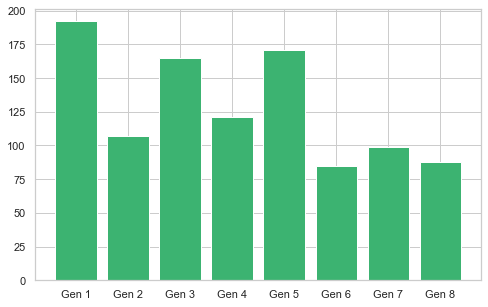

In [79]:

gens = ['Gen 1','Gen 2','Gen 3','Gen 4','Gen 5','Gen 6','Gen 7','Gen 8']
total_count_per_gen = [192, 107, 165, 121, 171, 85, 99, 88]
plt.figure(figsize=(8,5))
plt.bar(gens, total_count_per_gen, width = 0.8, color = 'mediumseagreen')


# INSIGHT NOTE:

Ok so now we know how many of the apparent dominate type 1 pokemon represent those averages
lets see the percentage of pokemon that primary type represents.


- 14 Psychic types

- 1 Poison type

- 12 Dragon types

- 1 Fairy type

- 2 Flying types

- 6 Dragon types

- 3 Psychic types

- 2 Poison types



In [14]:
percentage_gen1_psychic = round((14/192)*100,2)
print(percentage_gen1_psychic)

percentage_gen2_poison = round((1/107)*100,2)
print(percentage_gen2_poison)

percentage_gen3_dragon = round((12/165)*100,2)
print(percentage_gen3_dragon)

percentage_gen4_fairy = round((1/121)*100,2)
print(percentage_gen4_fairy)

percentage_gen5_flying = round((2/171)*100,2)
print(percentage_gen5_flying)

percentage_gen6_dragon = round((6/85)*100,2)
print(percentage_gen6_dragon)

percentage_gen7_psychic = round((3/99)*100,2)
print(percentage_gen7_psychic)

percentage_gen8_poison = round((2/88)*100,2)
print(percentage_gen8_poison)



7.29
0.93
7.27
0.83
1.17
7.06
3.03
2.27


# INSIGHT NOTE:

Lets look into the median value of the represented types.
2.5 is our mean.

lets only look into type 1 pokemon that have at least 3 
representing type 1 pokemon for that Gen.

This means we need to find a new type for.

Gens: 2
Gens: 4
Gens: 5
Gens: 8 

In [81]:
median_types = [1,1,2,2,3,6,12,14]
print("Median:  ",np.median(median_types))


#-----------
# The next highest base stat type is steel they have 3 pokemon. 
gen_2 = total_type1_per_gen.Steel
print(gen_2)
# The next highest base stat type is Dark they have 3 pokemon.
gen_4 = total_type1_per_gen.Dark
print(gen_4)
# The next highest base stat type is Dragon they have 9 pokemon.
gen_5 = total_type1_per_gen.Dragon
print(gen_5)
# The next highest base stat type is Fairy they have 4 pokemon. 
gen_8 = total_type1_per_gen.Fairy
print(gen_8)
#-----------


Median:   2.5
generation
1     1
2     3
3    12
4     3
5     4
6     5
7     4
8     4
Name: type_1, dtype: int64
generation
1     4
2     6
3     8
4     3
5    13
6     3
7     1
8     6
Name: type_1, dtype: int64
generation
1     3
3    12
4     4
5     9
6     6
7     3
8     3
Name: type_1, dtype: int64
generation
1    2
2    5
4    1
6    9
7    1
8    4
Name: type_1, dtype: int64


In [23]:
# Now lets recalculate the total percentage of representation
# for the type now in comparison to the total pokemon in the gen

percentage_gen1_psychic = round((14/192)*100,2)
print(percentage_gen1_psychic)

percentage_gen2_steel = round((3/107)*100,2)
print(percentage_gen2_steel)

percentage_gen3_dragon = round((12/165)*100,2)
print(percentage_gen3_dragon)

percentage_gen4_dark = round((3/121)*100,2)
print(percentage_gen4_dark)

percentage_gen5_dragon = round((9/171)*100,2)
print(percentage_gen5_dragon)

percentage_gen6_dragon = round((6/85)*100,2)
print(percentage_gen6_dragon)

percentage_gen7_psychic = round((3/99)*100,2)
print(percentage_gen7_psychic)

percentage_gen8_fairy = round((4/88)*100,2)
print(percentage_gen8_fairy)


7.29
2.8
7.27
2.48
5.26
7.06
3.03
4.55


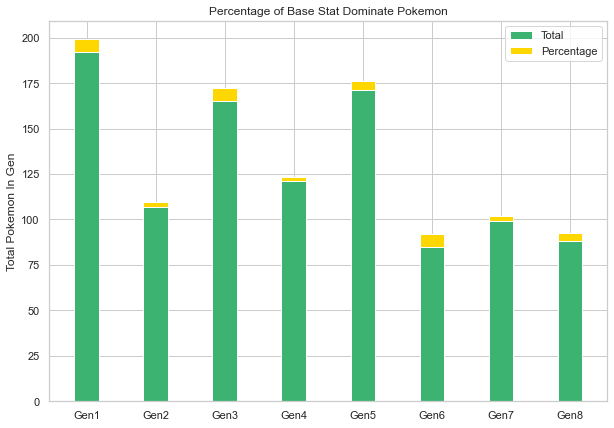

In [80]:

labels = ['Gen1', 'Gen2', 'Gen3', 'Gen4', 'Gen5', 'Gen6', 'Gen7', 'Gen8']
total_in_gen =  [192, 107, 165, 121, 171, 85, 99, 88]
percentage_in_gen = [7.29, 2.8, 7.27, 2.48, 5.26, 7.06, 3.03, 4.55]
width = 0.35 

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(labels, total_in_gen, width, label='Total', color = "mediumseagreen")

ax.bar(labels, percentage_in_gen, width, bottom=total_in_gen,
       label='Percentage', color="gold")

ax.set_ylabel('Total Pokemon In Gen')
ax.set_title('Percentage of Base Stat Dominate Pokemon')

ax.legend()

# INSIGHT NOTE:

I can now answer the question alot more more confidently.
On which type 1 pokemon dominated each respective generation
based on Base Stat and the median representation compare to the 
other dominating types across each gen.

----------------------

- Generation 1: Psychic

- Generation 2: Steel

- Generation 3: Dragon

- Generation 4: Dark

- Generation 5: Dragon

- Generation 6: Dragon

- Generation 7: Psychic

- Generation 8: Fairy

----------------------



# INSIGHT NOTE:

After some evaluation we can see that 
among the dominate type 1 pokemon 
across 8 gens Dragon & Psychic are at 
the top of the list. 

-- If you are looking at building a team
definitely look into adding a dragon 
or psychic type.


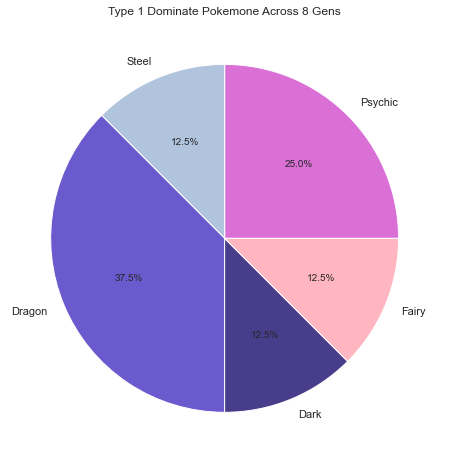

In [141]:
type_percentage = [25,12.5,37.5,12.5,12.5]
type_categories = ['Psychic','Steel','Dragon','Dark', 'Fairy']
colors = ['orchid','lightsteelblue','slateblue','darkslateblue','lightpink']
plt.figure(figsize=(12,8))
plt.pie(type_percentage, labels=type_categories,autopct='%0.1f%%',colors=colors)
plt.title("Type 1 Dominate Pokemone Across 8 Gens")
plt.show()
#plt.legend(type_categories)

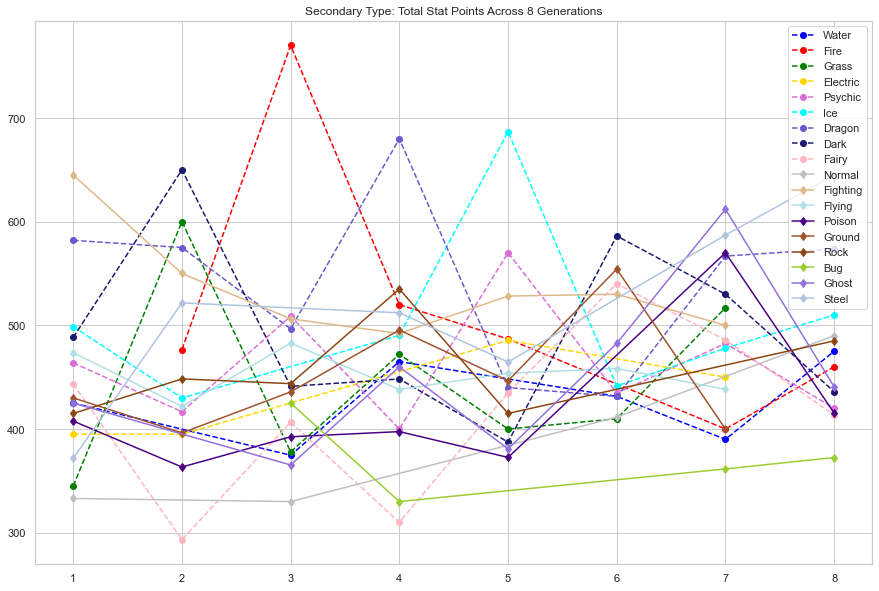

In [152]:
fig = plt.figure(figsize=(15,10))

plt.title('Secondary Type: Total Stat Points Across 8 Generations')

plt.plot(type2_avg.Water, color='blue', linestyle='dashed', marker='o', label='Water')

plt.plot(type2_avg.Fire, color='red', linestyle='dashed', marker='o', label='Fire')

plt.plot(type2_avg.Grass, color='green', linestyle='dashed', marker='o', label='Grass')

plt.plot(type2_avg.Electric, color='gold', linestyle='dashed', marker='o', label='Electric')

plt.plot(type2_avg.Psychic, color='orchid', linestyle='dashed', marker='o', label='Psychic')

plt.plot(type2_avg.Ice, color='cyan', linestyle='dashed', marker='o', label='Ice')

plt.plot(type2_avg.Dragon, color='slateblue', linestyle='dashed', marker='o', label='Dragon')

plt.plot(type2_avg.Dark, color='midnightblue', linestyle='dashed', marker='o', label='Dark')

plt.plot(type2_avg.Fairy, color='lightpink', linestyle='dashed', marker='o', label='Fairy' )

plt.plot(type2_avg.Normal, color='silver', linestyle='solid', marker='d', label='Normal')

plt.plot(type2_avg.Fighting, color='burlywood', linestyle='solid', marker='d', label='Fighting')

plt.plot(type2_avg.Flying, color='powderblue', linestyle='solid', marker='d', label='Flying')

plt.plot(type2_avg.Poison, color='indigo', linestyle='solid', marker='d', label='Poison')

plt.plot(type2_avg.Ground, color='sienna', linestyle='solid', marker='d', label='Ground')

plt.plot(type2_avg.Rock, color='saddlebrown', linestyle='solid', marker='d', label='Rock')

plt.plot(type2_avg.Bug,  color='yellowgreen', linestyle='solid', marker='d', label='Bug')

plt.plot(type2_avg.Ghost,  color='mediumpurple', linestyle='solid', marker='d', label='Ghost')

plt.plot(type2_avg.Steel,  color='lightsteelblue', linestyle='solid', marker='d', label='Steel')

plt.legend(loc="upper right")


In [166]:
gen_1 = total_type2_per_gen.Ice
print(gen_1)
gen_2 = total_type2_per_gen.Steel
print(gen_2)
gen_3 = total_type2_per_gen.Psychic
print(gen_3)
gen_4 = total_type2_per_gen.Dragon
print(gen_4)
gen_5 = total_type2_per_gen.Ice
print(gen_5)
gen_6 = total_type2_per_gen.Dark
print(gen_6)
gen_7 = total_type2_per_gen.Ghost
print(gen_7)
gen_8 = total_type2_per_gen.Steel
print(gen_8)

median_types = [1,2,2,3,3,4,4,5]

print("Median:  ",np.median(median_types))

generation
1    4
2    1
4    5
5    3
6    2
7    1
8    3
Name: type_1, dtype: int64
generation
1    6
2    3
4    9
5    9
7    5
8    3
Name: type_1, dtype: int64
generation
1     8
2     3
3    16
4     2
5     2
6     3
7     2
8     2
Name: type_1, dtype: int64
generation
1    2
2    2
3    3
4    4
5    3
6    5
7    5
8    8
Name: type_1, dtype: int64
generation
1    4
2    1
4    5
5    3
6    2
7    1
8    3
Name: type_1, dtype: int64
generation
1    3
2    2
3    7
4    4
5    3
6    4
7    1
8    2
Name: type_1, dtype: int64
generation
1    1
3    3
4    2
5    5
6    5
7    5
8    4
Name: type_1, dtype: int64
generation
1    6
2    3
4    9
5    9
7    5
8    3
Name: type_1, dtype: int64
Median:   3.0


The median is again 3 pokemon minimum so lets reselect for these gens
Gen: 1, Gen: 2, Gen: 3


# INSIGHT NOTE:

I can now answer the second question alot more more confidently.
On which type 2 pokemon dominated each respective generation
based on Base Stat and the median representation compare to the 
other dominating types across each gen.

----------------------

- Generation 1: Ice

- Generation 2: Steel

- Generation 3: Psychic

- Generation 4: Dragon

- Generation 5: Ice

- Generation 6: Dark

- Generation 7: Ghost

- Generation 8: Steel

----------------------

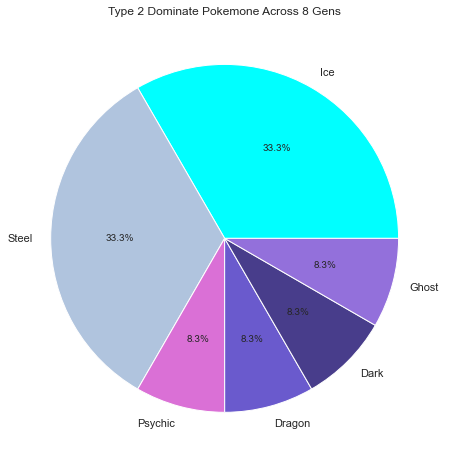

In [172]:
type_percentage = [33.33,33.33,8.33,8.33,8.33,8.33]
type_categories = ['Ice','Steel','Psychic','Dragon', 'Dark', 'Ghost']
colors = ['cyan','lightsteelblue','orchid','slateblue','darkslateblue','mediumpurple']
plt.figure(figsize=(12,8))
plt.pie(type_percentage, labels=type_categories,autopct='%0.1f%%',colors=colors)
plt.title("Type 2 Dominate Pokemone Across 8 Gens")
plt.show()
#plt.legend(type_categories)

Text(0.5, 1.0, 'Ghost')

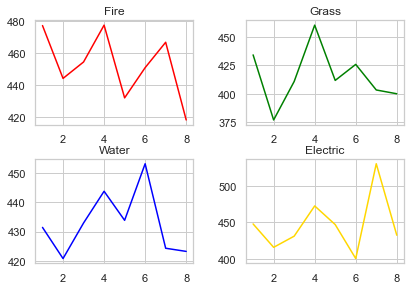

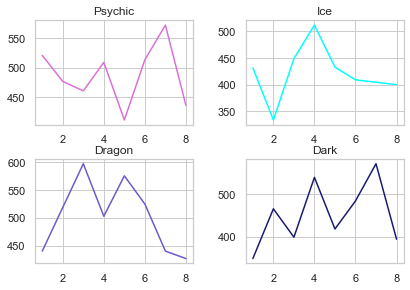

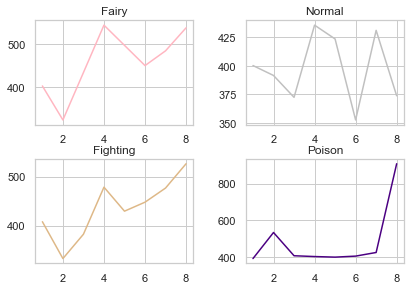

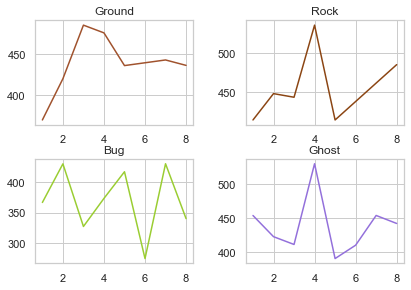

In [128]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Fire, color='red')
axs[0,0].set_title('Fire')
axs[0,1].plot(type1_avg.Grass, color='green')
axs[0,1].set_title('Grass')
axs[1,0].plot(type1_avg.Water, color='blue')
axs[1,0].set_title('Water')
axs[1,1].plot(type1_avg.Electric, color='gold')
axs[1,1].set_title('Electric')

fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Psychic, color='orchid')
axs[0,0].set_title('Psychic')
axs[0,1].plot(type1_avg.Ice, color='cyan')
axs[0,1].set_title('Ice')
axs[1,0].plot(type1_avg.Dragon, color='slateblue')
axs[1,0].set_title('Dragon')
axs[1,1].plot(type1_avg.Dark, color='midnightblue')
axs[1,1].set_title('Dark')

fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Fairy, color='lightpink')
axs[0,0].set_title('Fairy')
axs[0,1].plot(type1_avg.Normal, color='silver')
axs[0,1].set_title('Normal')
axs[1,0].plot(type1_avg.Fighting, color='burlywood')
axs[1,0].set_title('Fighting')
axs[1,1].plot(type1_avg.Poison, color='indigo')
axs[1,1].set_title('Poison')


fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Ground, color='sienna')
axs[0,0].set_title('Ground')
axs[0,1].plot(type2_avg.Rock, color='saddlebrown')
axs[0,1].set_title('Rock')
axs[1,0].plot(type1_avg.Bug, color='yellowgreen')
axs[1,0].set_title('Bug')
axs[1,1].plot(type1_avg.Ghost, color='mediumpurple')
axs[1,1].set_title('Ghost')

INSIGHT NOTES:

Flying Types are the only type introduced in Generation 1
that was not a primary type for pokemon until Generation 5
in which we can see that Flying types had thier peak in overall stats.

In [1]:
fig = plt.figure(figsize=(5,5))

plt.title('Flying Type Primary Full')

plt.plot(type1_avg.Flying, color='powderblue', linestyle='dashed', marker='o', label='Flying')
plt.plot(type2_avg.Flying, color='powderblue', linestyle='solid', marker='d', label='Flying')



fig = plt.figure(figsize=(5,5))

plt.title('Steel Type Primary')

plt.plot(type1_avg.Steel, color='lightsteelblue', linestyle='dashed', marker='o', label='Steel')
plt.plot(type2_avg.Steel, color='lightsteelblue', linestyle='solid', marker='o', label='Steel')


NameError: name 'plt' is not defined

[Text(0, 0, 'Grass'),
 Text(1, 0, 'Fire'),
 Text(2, 0, 'Water'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'Normal'),
 Text(5, 0, 'Dark'),
 Text(6, 0, 'Poison'),
 Text(7, 0, 'Electric'),
 Text(8, 0, 'Ground'),
 Text(9, 0, 'Ice'),
 Text(10, 0, 'Fairy'),
 Text(11, 0, 'Steel'),
 Text(12, 0, 'Fighting'),
 Text(13, 0, 'Psychic'),
 Text(14, 0, 'Rock'),
 Text(15, 0, 'Ghost'),
 Text(16, 0, 'Dragon'),
 Text(17, 0, 'Flying')]

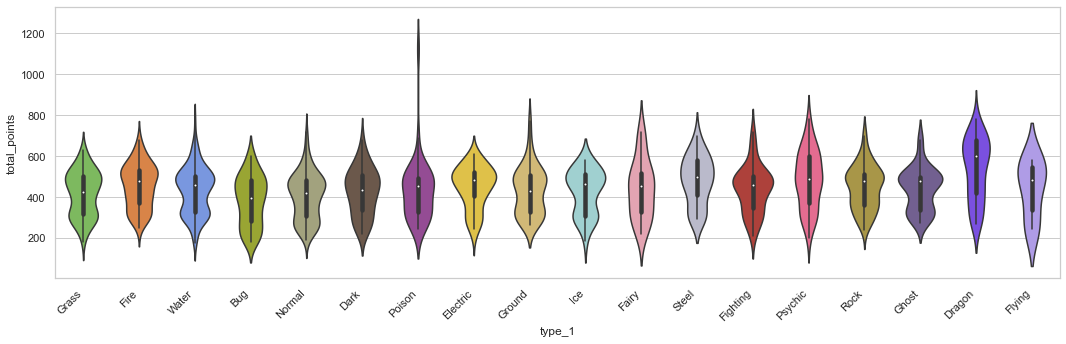

In [143]:
# Color Orient the types
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#705746',  # Dark
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#98D8D8',  # Ice
                    '#EE99AC',  # Fairy
                    '#B7B7CE',  # Steel
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#7038F8',  # Dragon
                    '#A98FF3',  # Flying
                   ]

plt.figure(figsize=(18,5))
chart = sns.violinplot(x = 'type_1',
                       y = 'total_points',
                       data = pokedex,
                       palette = pkmn_type_colors)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right')

<AxesSubplot:>

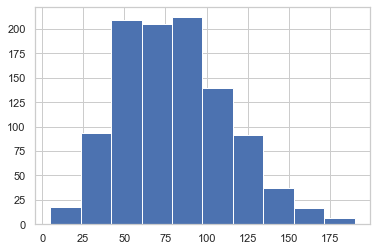

In [101]:
pokedex.attack.hist()

In [173]:
# HP

type1_hp=pd.pivot_table(pokedex, index = 'type_1', values = 'hp')
type2_hp=pd.pivot_table(pokedex, index = 'type_2', values = 'hp')

print("Health",type1_hp)
print("Health",type2_hp)


# ATTACK 

type1_attack=pd.pivot_table(pokedex, index = 'type_1', values = 'attack')
type2_attack=pd.pivot_table(pokedex, index = 'type_2', values = 'attack')


print("Attack",type1_attack)
print("Attack",type2_attack)

# DEFENSE 

type1_defense=pd.pivot_table(pokedex, index = 'type_1', values = 'defense')
type2_defense=pd.pivot_table(pokedex, index = 'type_2', values = 'defense')

print("Defense",type1_defense)
print("Defense",type2_defense)

# Special DEFENSE 

type1_spdefense=pd.pivot_table(pokedex, index = 'type_1', values = 'sp_defense')
type2_spdefense=pd.pivot_table(pokedex, index = 'type_2', values = 'sp_defense')

print("SP_Defense",type1_spdefense)
print("SP_Defense",type2_spdefense)

# Special ATTACK 

type1_spattack=pd.pivot_table(pokedex, index = 'type_1', values = 'sp_attack')
type2_spattack=pd.pivot_table(pokedex, index = 'type_2', values = 'sp_attack')

print("SP_Defense",type1_spattack)
print("SP_Defense",type2_spattack)


# SPEED


type1_speed=pd.pivot_table(pokedex, index = 'type_1', values = 'speed')
type2_speed=pd.pivot_table(pokedex, index = 'type_2', values = 'speed')

print("Speed",type1_speed)
print("Speed",type2_speed)




Health                  hp
type_1             
Bug       57.024691
Dark      68.818182
Dragon    82.375000
Electric  61.950820
Fairy     72.954545
Fighting  71.394737
Fire      69.430769
Flying    69.625000
Ghost     63.951220
Grass     66.736264
Ground    70.853659
Ice       71.500000
Normal    77.052174
Poison    73.948718
Psychic   71.973684
Rock      67.100000
Steel     69.527778
Water     70.888060
Health                  hp
type_2             
Bug       57.333333
Dark      76.115385
Dragon    92.812500
Electric  76.181818
Fairy     64.365854
Fighting  80.125000
Fire      74.470588
Flying    71.449541
Ghost     64.920000
Grass     62.923077
Ground    79.820513
Ice       87.736842
Normal    63.454545
Poison    60.447368
Psychic   72.394737
Rock      70.866667
Steel     68.628571
Water     60.421053
Attack               attack
type_1              
Bug        71.074074
Dark       81.000000
Dragon    107.200000
Electric   74.573770
Fairy      68.090909
Fighting  101.263158
Fire       

In [190]:
'''
- Generation 1: Psychic - Generation 1: Ice

- Generation 2: Steel - Generation 2: Steel

- Generation 3: Dragon - Generation 3: Psychic

- Generation 4: Dark - Generation 4: Dragon

- Generation 5: Dragon - Generation 5: Ice

- Generation 6: Dragon - Generation 6: Dark

- Generation 7: Psychic - Generation 7: Ghost

- Generation 8: Fairy - Generation 8: Steel

'''



#Dragon 4x Frequency 
t1_dragon_mean_stats = [82.37, 107.2, 84.77, 84.95, 91.52, 84.90]
t2_dragon_mean_stats = [92.81, 93.87, 93.28, 84.4, 102.81 , 77.34]

'''
Enter remaining mean values per type and then plot distribution

- Psychic 3x
- Steel 2x
- Dark 2x
- Ice 2x
- Fairy 1x
- Ghost 1x
'''

'\n- Psychic 3x\n- Steel 2x\n- Dark 2x\n- Ice 2x\n- Fairy 1x\n- Ghost 1x\n'

In [140]:
'''
Find Individual Pokemon

find_pokemon = pokedex.name=='Garchomp'
print(pokedex.loc[find_pokemon,:].describe())
'''

"\nFind Individual Pokemon\n\nfind_pokemon = pokedex.name=='Garchomp'\nprint(pokedex.loc[find_pokemon,:].describe())\n"